# 불연성 쓰레기

In [ ]:
#불쓰데이터
df = pd.read_csv('/content/gdrive/MyDrive/prac/불쓰/불쓰오개년.csv')
df = df.rename(columns={'Unnamed: 0': '구역'})

In [ ]:
#범주화
df = pd.get_dummies(df, columns = ['구역','년도'])
df

,불쓰양,세대수,주택수,인구,구역_강서구,구역_금정구,구역_기장군,구역_남구,구역_동구,구역_동래구,구역_부산진구,구역_북구,구역_사상구,구역_사하구,구역_서구,구역_수영구,구역_연제구,구역_영도구,구역_중구,구역_해운대구,년도_2015,년도_2016,년도_2017,년도_2018,년도_2019
0,2190.0,23295,20638,16795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,803.0,53199,46842,8443,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1423.5,43430,37865,9638,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1314.0,56446,52448,9276,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2956.5,165199,153541,12939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5110.0,106766,99022,16476,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,4964.0,114120,109345,10703,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,4599.0,118865,111109,7927,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8,4416.5,164386,153270,8316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,3577.0,134692,127160,8211,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#독립변수
x = df[['세대수', '주택수', '인구', '구역_강서구', '구역_금정구', '구역_기장군', '구역_남구',
       '구역_동구', '구역_동래구', '구역_부산진구', '구역_북구', '구역_사상구', '구역_사하구', '구역_서구',
       '구역_수영구', '구역_연제구', '구역_영도구', '구역_중구', '구역_해운대구', '년도_2015', '년도_2016',
       '년도_2017', '년도_2018', '년도_2019']]

#종속변수
y = df['불쓰양']

## 모델링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = sc.fit_transform(x)
X = pd.DataFrame(X, columns=[X.columns], index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

def smape(true, pred):
      v = 2 * abs(pred - true) / (abs(pred) + abs(true))
      output = np.mean(v) * 100
      return output
SMAPE = smape(y_test, y_pred)

print('R2 :', R2)
print('MAE :', MAE)
print('평균불쓰양 :', df['불쓰양'].mean())
print('SMAPE : ', SMAPE)

R2 : 0.6848834506364844
MAE : 500.1054375
평균불쓰양 : 2041.9650000000001
SMAPE :  24.59705973843701


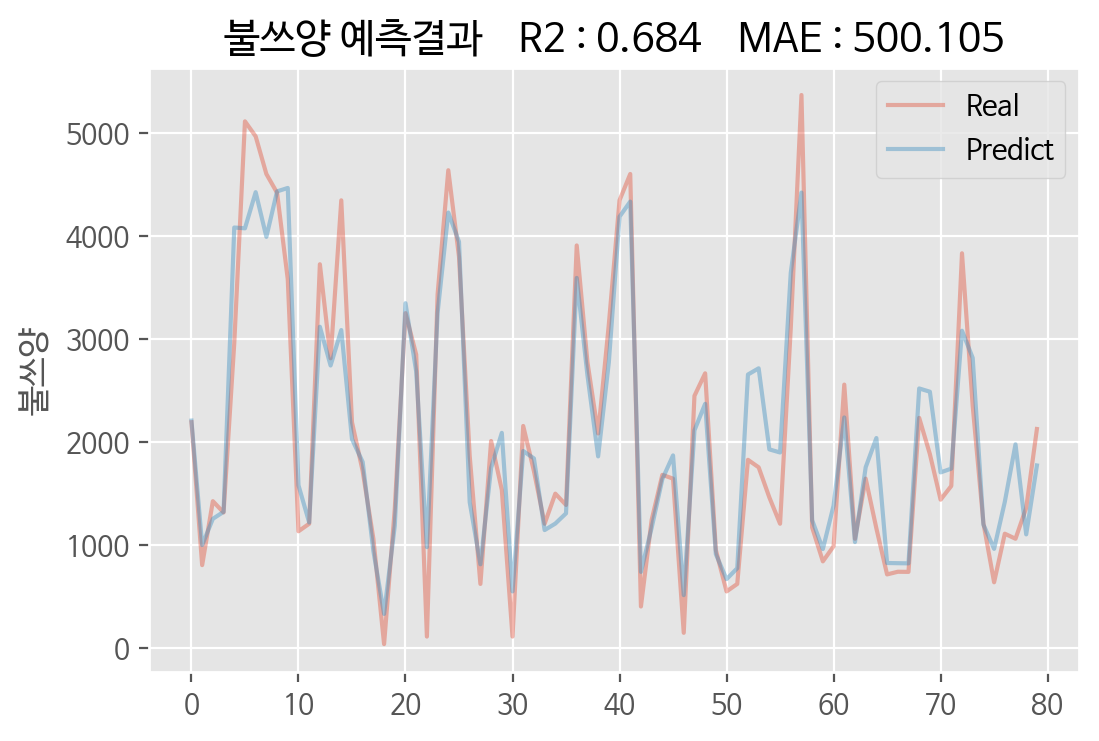

In [ ]:
plt.figure(dpi=200)
plt.title('불쓰양 예측결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('불쓰양')
plt.plot(np.array(y), alpha = 0.4, label = 'Real')
plt.plot(model.predict(x), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()